In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression


In [ ]:
data=pd.read_csv('parkinsons.csv')

PREPROCESSING:


In [ ]:
data.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

CHECKING THE ATTRIBUTES THAT ARE CATEGORICAL

In [ ]:
data.dtypes=='object'

name                 True
MDVP:Fo(Hz)         False
MDVP:Fhi(Hz)        False
MDVP:Flo(Hz)        False
MDVP:Jitter(%)      False
MDVP:Jitter(Abs)    False
MDVP:RAP            False
MDVP:PPQ            False
Jitter:DDP          False
MDVP:Shimmer        False
MDVP:Shimmer(dB)    False
Shimmer:APQ3        False
Shimmer:APQ5        False
MDVP:APQ            False
Shimmer:DDA         False
NHR                 False
HNR                 False
status              False
RPDE                False
DFA                 False
spread1             False
spread2             False
D2                  False
PPE                 False
dtype: bool

In [ ]:
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [ ]:
data.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
data.iloc[:,1:15].columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA'],
      dtype='object')

In [ ]:
data.head

<bound method NDFrame.head of                name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP

In [ ]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
corr=data.iloc[:,1:15].corr()

<Axes: >

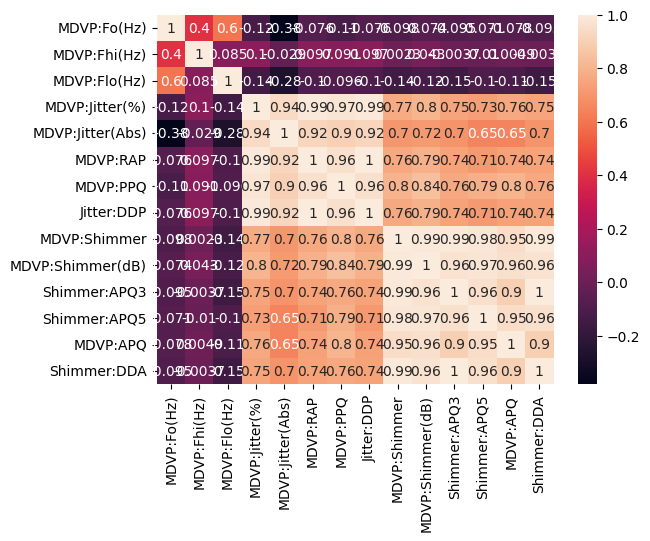

In [ ]:
sns.heatmap(corr,annot=True)

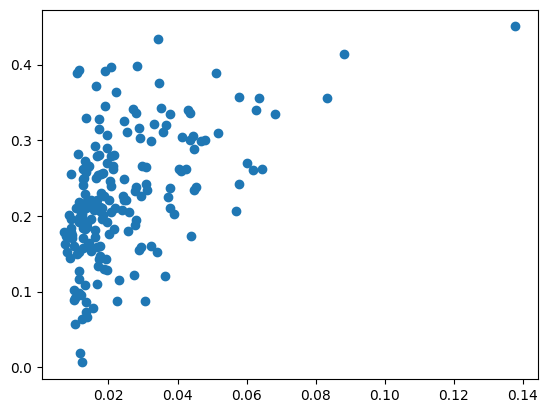

In [ ]:
plt.scatter(data['MDVP:APQ'], data['spread2'])

In [ ]:
data=data.drop(['spread2'],axis=1)

In [ ]:
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'D2', 'PPE'],
      dtype='object')

In [ ]:
data.shape

(195, 23)

In [ ]:
data.to_csv('PREPROCESSEDPARKINSON.csv')

LABEL ENCODED


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
l=LabelEncoder()

In [ ]:
data['name']=l.fit_transform(data['name'])

In [ ]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,D2,PPE
0,0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,2.301442,0.284654
1,1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,2.486855,0.368674
2,2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,2.342259,0.332634
3,3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,2.405554,0.368975
4,4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,2.332180,0.410335


In [ ]:
len(data['MDVP:Fo(Hz)'].unique())

195

MinMaxScaling is applied


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mx=MinMaxScaler()

In [ ]:
data_norm=pd.DataFrame(mx.fit_transform(data))

In [ ]:
data_norm.columns=data.columns

In [ ]:
data_norm.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,D2,PPE
0,0.000000,0.184308,0.112592,0.054815,0.195680,0.249012,0.145472,0.247588,0.145288,0.312215,...,0.172448,0.332584,0.068307,0.511745,1.0,0.369155,0.960148,0.569875,0.390661,0.497310
1,0.005155,0.198327,0.094930,0.278323,0.254130,0.288538,0.191233,0.323687,0.191042,0.472887,...,0.279424,0.516048,0.059331,0.432577,1.0,0.470830,0.977024,0.703277,0.473145,0.671326
2,0.010309,0.165039,0.059128,0.265288,0.280178,0.328063,0.229287,0.369239,0.229411,0.390634,...,0.219848,0.443317,0.039596,0.496220,1.0,0.404416,1.000000,0.636745,0.408819,0.596682
3,0.015464,0.165004,0.072927,0.264200,0.263342,0.328063,0.209056,0.324759,0.208862,0.414278,...,0.233785,0.475478,0.040997,0.495936,1.0,0.416255,0.975885,0.695627,0.436977,0.671949
4,0.020619,0.161150,0.080909,0.260107,0.354511,0.407115,0.282755,0.437299,0.282870,0.499452,...,0.286852,0.584542,0.054174,0.455499,1.0,0.375159,0.992813,0.762472,0.404336,0.757611


THE CORRELATION IS CHECKED

In [ ]:
data_norm.corr()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,D2,PPE
name,1.000000,0.035996,0.138838,-0.054709,0.103386,0.032092,0.129494,0.061538,0.129525,0.011911,...,0.027510,0.013474,0.177582,-0.214318,-0.167497,0.081444,-0.315645,0.018943,0.101137,-0.060412
MDVP:Fo(Hz),0.035996,1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,...,-0.077774,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,0.177980,-0.372356
MDVP:Fhi(Hz),0.138838,0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,...,0.004937,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,0.176323,-0.069543
MDVP:Flo(Hz),-0.054709,0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,...,-0.107293,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.100629,-0.340071
MDVP:Jitter(%),0.103386,-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,...,0.758255,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.433434,0.721543
MDVP:Jitter(Abs),0.032092,-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,...,0.648793,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.310694,0.748162
MDVP:RAP,0.129494,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,...,0.737455,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.426605,0.670999
MDVP:PPQ,0.061538,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,...,0.804139,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.412524,0.769647
Jitter:DDP,0.129525,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,...,0.737439,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.426556,0.671005
MDVP:Shimmer,0.011911,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,...,0.950083,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.507088,0.693771


<Axes: >

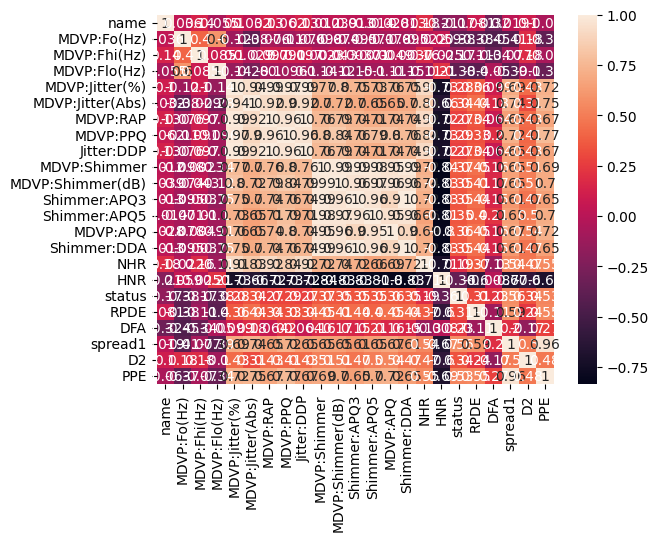

In [ ]:
sns.heatmap(data_norm.corr(),annot=True)

CORRELATION BETWEEN THE FEATURES 'MDVP:APQ' AND 'PPE'


<Axes: xlabel='MDVP:APQ', ylabel='PPE'>

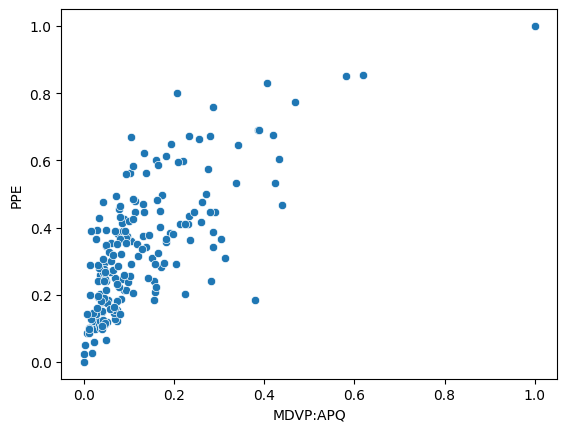

In [ ]:
sns.scatterplot(data=data_norm, x="MDVP:APQ", y="PPE")

DROPPING THE ENERGY COLUMN

In [ ]:
#Dropping the energy column
data=data_norm.drop('MDVP:APQ',axis=1)

CHECKING THE OUTLIERS


In [ ]:
#checking the outiers
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [ ]:
outliers = find_outliers_IQR(data['PPE'])

In [ ]:
outliers

17     0.799972
102    0.828939
146    0.855365
151    1.000000
152    0.849541
Name: PPE, dtype: float64

<Axes: xlabel='PPE'>

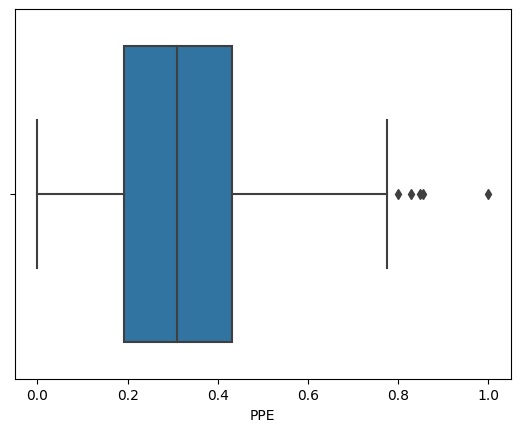

In [ ]:
sns.boxplot(x=data['PPE'])

In [ ]:
data['PPE']

0      0.497310
1      0.671326
2      0.596682
3      0.671949
4      0.757611
         ...   
190    0.183318
191    0.257558
192    0.180580
193    0.163137
194    0.215460
Name: PPE, Length: 195, dtype: float64

In [ ]:
def func(x):
    if 0 < x <= 0.65:
        return 0
    else:
        return 1

In [ ]:
data['MDVP:APQ'] = data['PPE'].apply(func)

In [ ]:
Y=data['MDVP:APQ']

In [ ]:
X=data.drop('MDVP:APQ',axis=1)

In [ ]:
Y

0      0
1      1
2      0
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: MDVP:APQ, Length: 195, dtype: int64

In [ ]:
data['MDVP:APQ'].value_counts().sort_index()

0    180
1     15
Name: MDVP:APQ, dtype: int64

TRAIN AND TEST DATA


In [ ]:
#splitting train and test data
X_train,X_test,Y_train,Y_test=train_test_split(X, Y,test_size=0.2, random_state=4)

In [ ]:
X_train.shape

(156, 22)

In [ ]:
X_test.shape

(39, 22)

In [ ]:
Y_train

26     0
80     0
176    0
113    0
105    0
      ..
104    0
129    0
183    0
174    0
122    0
Name: MDVP:APQ, Length: 156, dtype: int64

LOGISTIC REGRESSION

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy : ',accuracy_score(Y_test,y_pred))

Accuracy :  0.9230769230769231


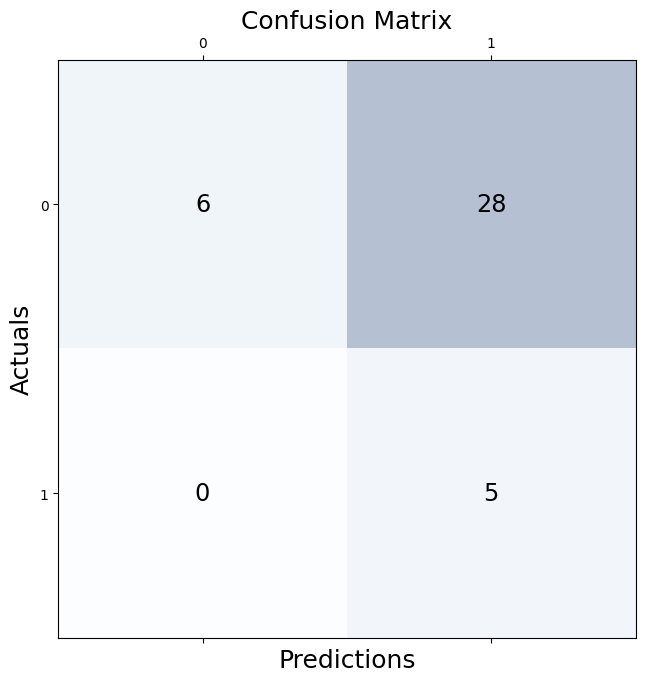

In [ ]:
#confusion matrix
conf_matrix = confusion_matrix(y_true=Y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

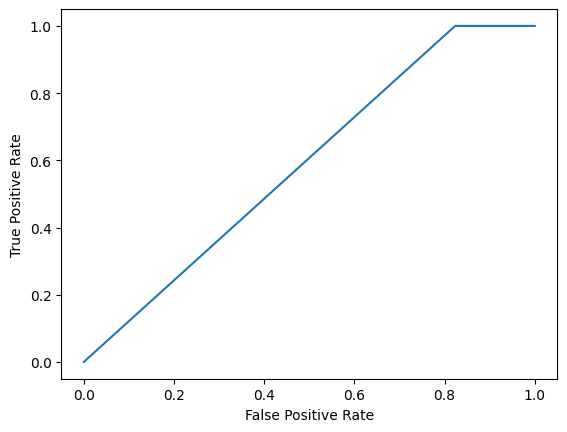

In [ ]:
#Roc curve
fpr, tpr, _ = roc_curve(Y_test,  y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

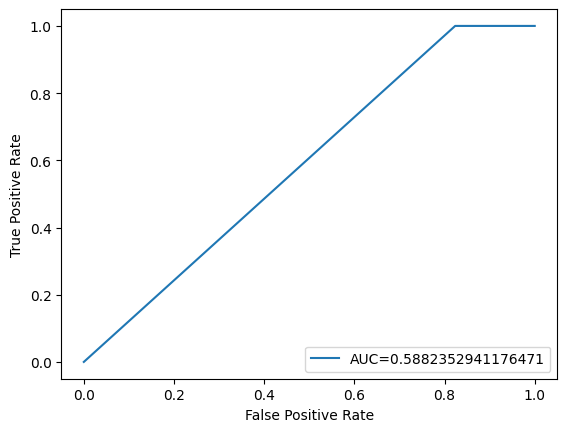

In [ ]:
auc = roc_auc_score(Y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

XGBoost CLASSIFIER

In [ ]:
xgb_reg = xgb.XGBClassifier()
xgb_reg.fit(X_train, Y_train)
y_pred = xgb_reg.predict(X_test)

In [ ]:
print('Accuracy : ',accuracy_score(Y_test,y_pred))

Accuracy :  0.9743589743589743


In [ ]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0])

In [ ]:
Y_test

11     0
143    0
34     1
171    0
1      1
69     0
153    0
191    0
48     0
181    0
185    0
150    0
101    0
61     0
93     0
186    0
82     0
184    0
71     0
182    0
89     0
83     0
155    0
33     0
88     0
110    0
6      0
14     0
121    0
192    0
18     1
154    0
177    0
165    0
167    0
99     1
111    0
102    1
120    0
Name: MDVP:APQ, dtype: int64

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

In [ ]:
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [ ]:
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best score: 0.9965517241379309


In [ ]:
xgb_reg = xgb.XGBClassifier(learning_rate=0.3,max_depth=7,n_estimators=200)

In [ ]:
params = {
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 1, 5],
    
}

In [ ]:
print('Accuracy:', accuracy_score(Y_test, y_pred))

Accuracy: 0.9743589743589743


In [ ]:
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=params, cv=5, scoring='roc_auc')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.3, m...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=7,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'gamma': [0, 1, 5], 'subsample': [0.7, 0.8, 0.9]},
             scoring='roc_auc')

In [ ]:
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best hyperparameters: {'colsample_bytree': 0.7, 'gamma': 0, 'subsample': 0.8}
Best score: 1.0


In [ ]:
print('Accuracy:', accuracy_score(Y_test, y_pred))

Accuracy: 0.9743589743589743


In [ ]:
from sklearn import tree

In [ ]:
clf = tree.DecisionTreeClassifier()

In [ ]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy:', accuracy_score(Y_test, y_pred))

Accuracy: 0.9743589743589743


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier()

In [ ]:
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy:', accuracy_score(Y_test, y_pred))

Accuracy: 0.9743589743589743


In [ ]:
import pickle

In [ ]:
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.9743589743589743


In [ ]:
y_pred = loaded_model.predict(X_test)

In [ ]:
print('Accuracy:', accuracy_score(Y_test, y_pred))

Accuracy: 0.9743589743589743


CONFUSION MATRIX

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

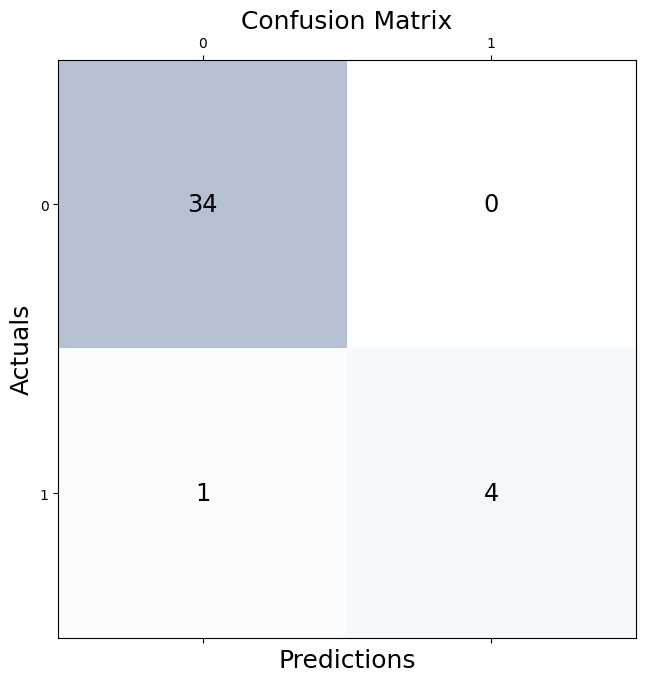

In [ ]:
#confusion matrix
conf_matrix = confusion_matrix(y_true=Y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

ROC CURVE


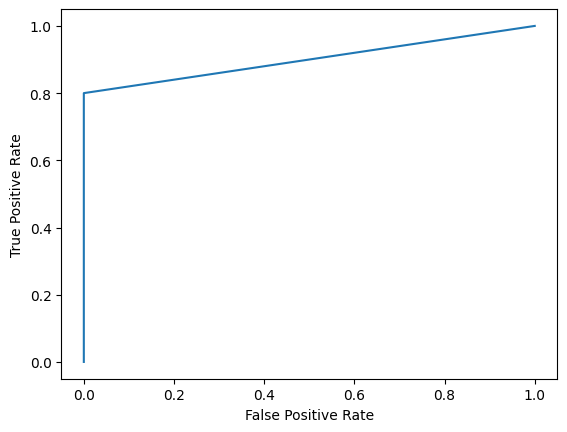

In [ ]:
#Roc curve
fpr, tpr, _ = roc_curve(Y_test,  y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

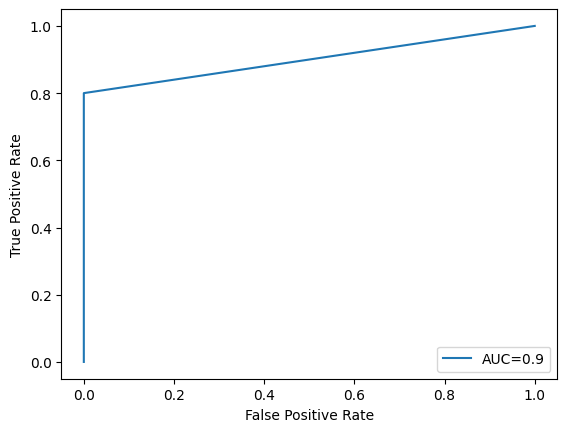

In [ ]:
auc = roc_auc_score(Y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

DETECTING PARKINSON'S DISEASE WITH XGBoost


In [ ]:
#DataFlair - Get the features and labels
features=data.loc[:,data.columns!='status'].values[:,1:]
labels=data.loc[:,'status'].values

In [ ]:
#DataFlair - Get the count of each label (0 and 1) in labels
print(labels[labels==1].shape[0], labels[labels==0].shape[0])

147 48


In [ ]:
#DataFlair - Scale the features to between -1 and 1
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels

In [ ]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)

GRADIENT BOOSTING ALGORITHM

In [ ]:
#DataFlair - Train the model
model=XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
# DataFlair - Calculate the accuracy
y_pred=model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

92.3076923076923


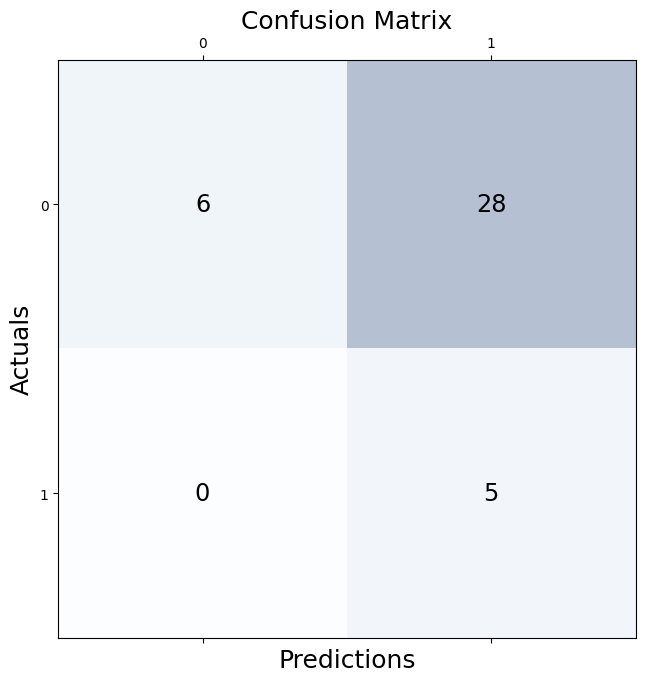

In [ ]:
#confusion matrix
conf_matrix = confusion_matrix(y_true=Y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

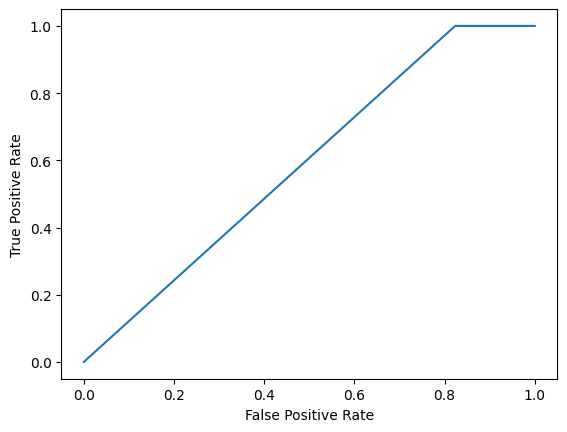

In [ ]:
#Roc curve
fpr, tpr, _ = roc_curve(Y_test,  y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

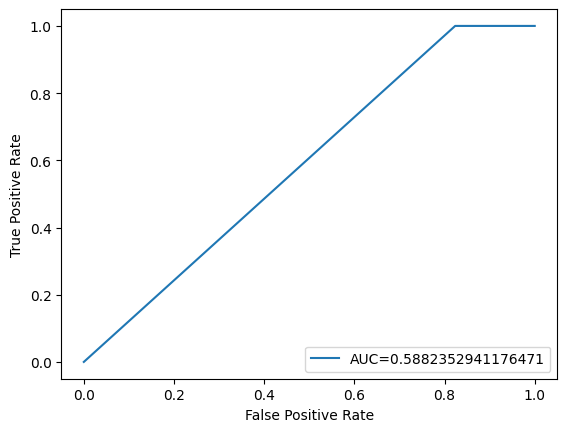

In [ ]:
auc = roc_auc_score(Y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()